In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# we have loaded the data we will work on 
data_df = pd.read_csv("VideoGamesSales.csv")
data_df.head()

,Rank,Name,Platform,Year,Month,Genre,Publisher,Country,City,State,Region,NA_Sales,Global_Sales,NA_Profit,Global_Profit
0,1,Wii Sports,Wii,2010,Jan,Sports,Nintendo,United States,Fairfield,California,West,$41.49,82.74,12.447,24.822
1,2,Super Mario Bros.,NES,2010,Feb,Platform,Nintendo,United States,Edmonds,Washington,West,$29.08,40.24,8.724,12.072
2,3,Mario Kart Wii,Wii,2010,Mar,Racing,Nintendo,United States,Louisville,Kentucky,South,$15.85,35.82,4.755,10.746
3,4,Wii Sports Resort,Wii,2010,Apr,Sports,Nintendo,United States,Round Rock,Texas,Central,$15.75,33.00,4.725,9.900
4,5,Pokemon Red/Pokemon Blue,GB,2010,May,Role-Playing,Nintendo,United States,Nashville,Tennessee,South,$11.27,31.37,3.381,9.411


In [8]:
#  to remove a duplicated values
data_df= data_df.drop_duplicates()

In [10]:
# we need to check if there is a null values
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5893 entries, 0 to 5908
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           5893 non-null   int64  
 1   Name           5893 non-null   object 
 2   Platform       5893 non-null   object 
 3   Year           5893 non-null   int64  
 4   Month          5893 non-null   object 
 5   Genre          5893 non-null   object 
 6   Publisher      5881 non-null   object 
 7   Country        5893 non-null   object 
 8   City           5893 non-null   object 
 9   State          5893 non-null   object 
 10  Region         5866 non-null   object 
 11  NA_Sales       5893 non-null   object 
 12  Global_Sales   5893 non-null   float64
 13  NA_Profit      5893 non-null   float64
 14  Global_Profit  5893 non-null   float64
dtypes: float64(3), int64(2), object(10)
memory usage: 736.6+ KB


In [22]:
# we need to fill the empty values to not have a nnull values
data_df['Region'].fillna('North')

0          West
1          West
2         South
3       Central
4         South
         ...   
5904       West
5905       West
5906       West
5907       West
5908       West
Name: Region, Length: 5893, dtype: object

In [34]:
#  we need to remove the dollar sign so we can work with it 
# regex =  true it means we remove the $ and give it the regular expression white space
data_df['NA_Sales'].replace('[$]','',regex=True)

# after we removed the dolloar sign we coverted the sales to a float type 
pd.to_numeric(data_df['NA_Sales'], errors='coerce')


0       41.49
1       29.08
2       15.85
3       15.75
4       11.27
        ...  
5904     0.21
5905     0.15
5906     0.24
5907     0.17
5908     0.00
Name: NA_Sales, Length: 5893, dtype: float64

In [84]:
# we get the average to fill the empty values with the average 
Average_sales = data_df["NA_Sales"].mean()
data_df['NA_Sales'].fillna(Average_sales)
data_df['NA_Sales']

0       41.49
1       29.08
2       15.85
3       15.75
4       11.27
        ...  
5904     0.21
5905     0.15
5906     0.24
5907     0.17
5908     0.00
Name: NA_Sales, Length: 5893, dtype: float64

In [110]:
# because in the country column there's differenet values of United states , USA we will change it to be one value to be United States
data_df['Country'].replace({'USA':'United States'})

# in this case we will make the value ( united states ) start with Capital letter using title() method
data_df['Country'].str.title()

# you can see now it becomes United States for all the values for all raw has United states as a  Country Value
data_df[data_df['Country'] == "United States"]

,Rank,Name,Platform,Year,Month,Genre,Publisher,Country,City,State,Region,NA_Sales,Global_Sales,NA_Profit,Global_Profit
0,1,Wii Sports,Wii,2010,Jan,Sports,Nintendo,United States,Fairfield,California,West,41.49,82.74,12.447,24.822
1,2,Super Mario Bros.,NES,2010,Feb,Platform,Nintendo,United States,Edmonds,Washington,West,29.08,40.24,8.724,12.072
2,3,Mario Kart Wii,Wii,2010,Mar,Racing,Nintendo,United States,Louisville,Kentucky,South,15.85,35.82,4.755,10.746
3,4,Wii Sports Resort,Wii,2010,Apr,Sports,Nintendo,United States,Round Rock,Texas,Central,15.75,33.00,4.725,9.900
4,5,Pokemon Red/Pokemon Blue,GB,2010,May,Role-Playing,Nintendo,United States,Nashville,Tennessee,South,11.27,31.37,3.381,9.411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2793,2782,The Lord of the Rings: The Two Towers,GBA,2015,Sep,Action,Electronic Arts,United States,Urbandale,Iowa,Central,0.53,0.74,0.159,0.222
2794,2783,Tiger Woods PGA Tour 2001,PS2,2015,Oct,Sports,Electronic Arts,United States,Henderson,Kentucky,South,0.36,0.74,0.108,0.222
2795,2784,Indiana Jones and the Staff of Kings,Wii,2015,Nov,Action,Activision,United States,Dallas,Texas,Central,0.36,0.74,0.108,0.222
2796,2785,Jet Moto 3,PS,2015,Dec,Racing,Sony Computer Entertainment,United States,San Luis Obispo,California,West,0.41,0.74,0.123,0.222


In [116]:
# we will change the columns name so we can work better with it
# we use rename method from pandas 
data_df = data_df.rename(columns={'NA_Sales':'National Sales','Global_Sales':'Global Sales','NA_Profit':'National Profit','Global_Profit':'Global Profit'})
data_df.head(5)

,Rank,Name,Platform,Year,Month,Genre,Publisher,Country,City,State,Region,National Sales,Global Sales,National Profit,Global Profit
0,1,Wii Sports,Wii,2010,Jan,Sports,Nintendo,United States,Fairfield,California,West,41.49,82.74,12.447,24.822
1,2,Super Mario Bros.,NES,2010,Feb,Platform,Nintendo,United States,Edmonds,Washington,West,29.08,40.24,8.724,12.072
2,3,Mario Kart Wii,Wii,2010,Mar,Racing,Nintendo,United States,Louisville,Kentucky,South,15.85,35.82,4.755,10.746
3,4,Wii Sports Resort,Wii,2010,Apr,Sports,Nintendo,United States,Round Rock,Texas,Central,15.75,33.00,4.725,9.900
4,5,Pokemon Red/Pokemon Blue,GB,2010,May,Role-Playing,Nintendo,United States,Nashville,Tennessee,South,11.27,31.37,3.381,9.411


In [134]:
# i want to get the sales cap to replace the bigger values with this values ..its one of cleaning the data frame so you can visualizing 
# quanttile is cut points dividing the range of a probability distribution into continuous intervals with equal probabilities

sales_cap = data_df['National Sales'].quantile(0.95)
# sales_cap = 2.07
data_df['National Sales'] = np.where(data_df['National Sales'] > sales_cap, sales_cap, data_df['National Sales'])
data_df.head(3)

,Rank,Name,Platform,Year,Month,Genre,Publisher,Country,City,State,Region,National Sales,Global Sales,National Profit,Global Profit
0,1,Wii Sports,Wii,2010,Jan,Sports,Nintendo,United States,Fairfield,California,West,2.07,82.74,12.447,24.822
1,2,Super Mario Bros.,NES,2010,Feb,Platform,Nintendo,United States,Edmonds,Washington,West,2.07,40.24,8.724,12.072
2,3,Mario Kart Wii,Wii,2010,Mar,Racing,Nintendo,United States,Louisville,Kentucky,South,2.07,35.82,4.755,10.746


In [ ]:
# Now we finished cleaning the dataset we are working on .. next we are going to drawing some plots as reports 
# we use it to help the business management

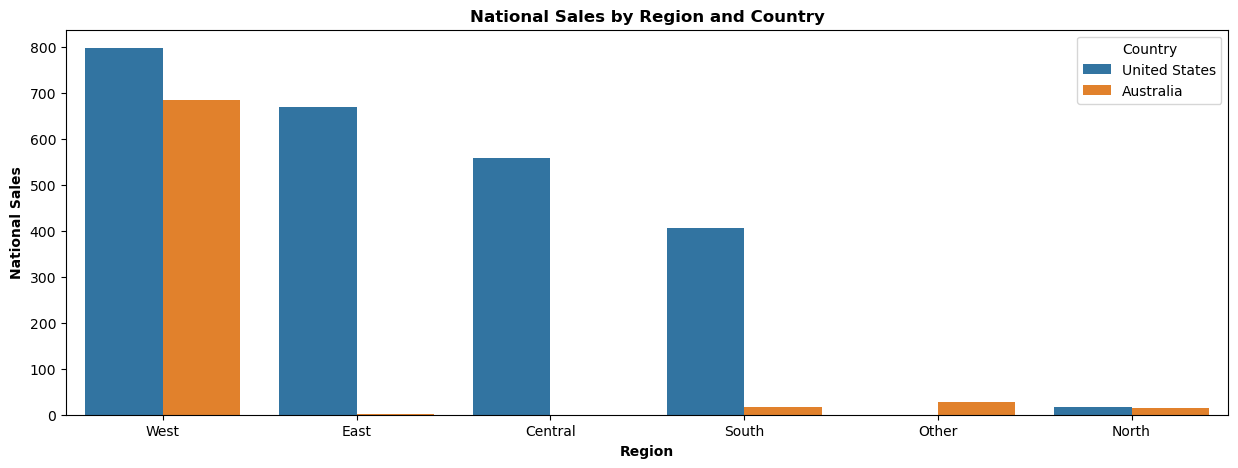

In [146]:
#create a bar Chart

# we want to get the national sales for the region and the country together we do it using groupbby method
National_Sales = data_df.groupby(['Region','Country'])['National Sales'].sum().reset_index().sort_values(by='National Sales', ascending=False)
National_Sales

plt.figure(figsize=(15,5))
sns.barplot(data=National_Sales, x='Region', y='National Sales',hue='Country')
plt.title('National Sales by Region and Country',fontweight='bold')
plt.xlabel('Region',fontweight='bold')
plt.ylabel('National Sales',fontweight='bold')
plt.show()


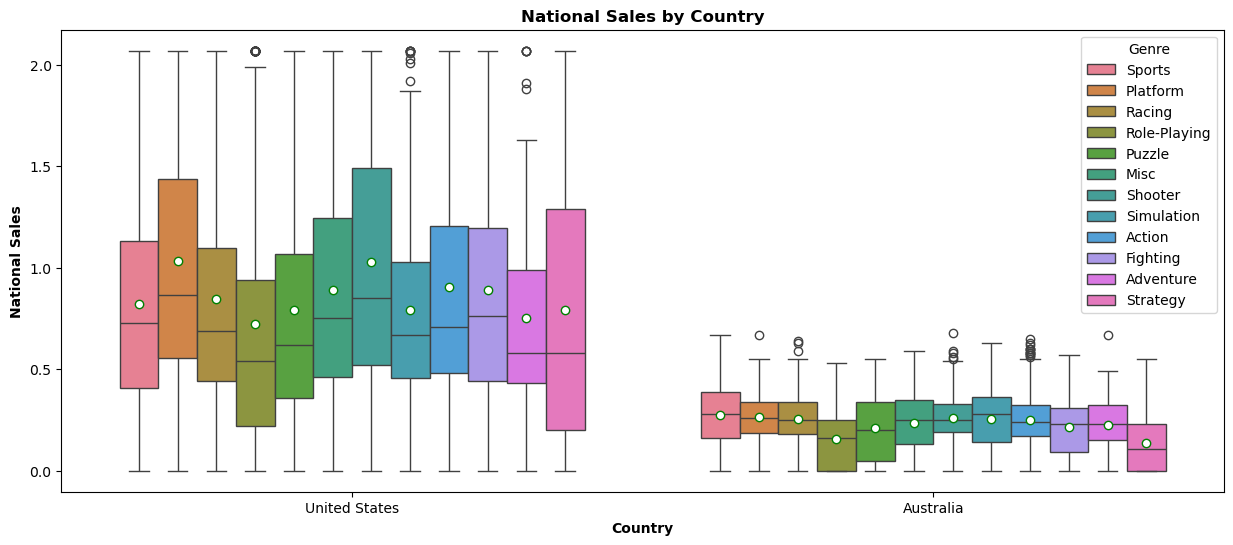

In [156]:
# create a boxplot
plt.figure(figsize=(15, 6))
# we use national sales and counrty 
# we told it to show the mean value
# the highest point is the highest value
# the down value is the lowest value 
# the last parameter is used to change the marker shape ,color and size ...you can see it on the mean (average) value
sns.boxplot(x='Country', y='National Sales', data=data_df,showmeans=True,hue='Genre',meanprops={"marker":"o"
                                                                                   ,"markerfacecolor":"white"
                                                                                   ,"markersize":"6"
                                                                                 ,"markeredgecolor":"green"})

plt.title('National Sales by Country',fontweight='bold')
plt.xlabel('Country',fontweight='bold')
plt.ylabel('National Sales',fontweight='bold')
plt.show()

In [162]:
# create a piechart
# we created a small data frame contain Country , National sales and Globale Sales  
sales = data_df.groupby(['Country'])[['National Sales','Global Sales']].sum().reset_index()
sales

,Country,National Sales,Global Sales
0,Australia,744.72,1468.25
1,United States,2447.92,6315.68


Text(0.5, 1.0, 'Global Sales by Country')

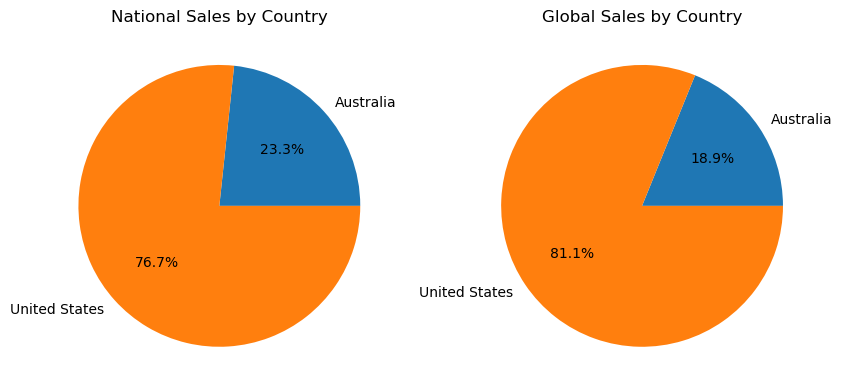

In [194]:
# we use this dataframe to fetch our data 
Country=sales['Country']
National_Sales=sales['National Sales']
Global_Sales=sales['Global Sales']

# now we create a many plots in one figure 
fig, axs = plt.subplots(1, 2, figsize=(10, 8))
# 1 = number of rows and 2 number of columns then the figure size

explode = (0, 0.1, 0, 0)
# we can handle the starting angel as we want
# we can put value on the oie chart by using this => autopct='%1.1f%%'
axs[0].pie(National_Sales, labels=Country,  autopct='%1.1f%%')
axs[0].set_title('National Sales by Country')

axs[1].pie(Global_Sales, labels=Country, autopct='%1.1f%%')
axs[1].set_title('Global Sales by Country')

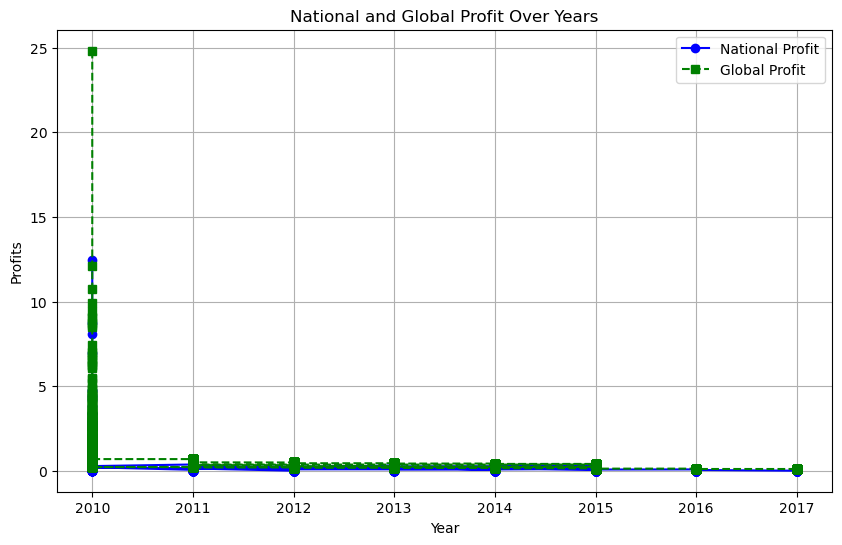

In [198]:
# Create a line chart
plt.figure(figsize=(10, 6))

# Line for National Profit
plt.plot(data_df['Year'], data_df['National Profit'], marker='o', linestyle='-', color='b', label='National Profit')

# Line for Global Profit
plt.plot(data_df['Year'], data_df['Global Profit'], marker='s', linestyle='--', color='g', label='Global Profit')

# Adding titles and labels
plt.title('National and Global Profit Over Years')
plt.xlabel('Year')
plt.ylabel('Profits')
plt.legend()

# Display the line chart
plt.grid(True)
plt.show()